# Controls charts&mdash;individual and moving range (XmR)

In [1]:
# Import the required libraries and modules.
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Read the csv data file. It is encoded in UTF-8.
# The values to plot are in column X.
# Set "date" as the index.
x_values = pd.read_csv('xmr.csv', parse_dates=True, index_col='Date')

In [3]:
# Define the graph title and subtitle, and the x and y axis labels.
title = 'XmR Control Chart'
subtitle = 'Travel cost'
ylabel = 'Travel cost (USD)'
xlabel = 'Date'

In [4]:
# Calculate a column of median values.
x_values['Median'] = x_values['X'].median()
# Calculate a column of average values.
x_values['Average'] = x_values['X'].mean()
# Calculate a column of monthly average values.
x_values['Monthly average'] = x_values['X'].sum(axis=0)/8

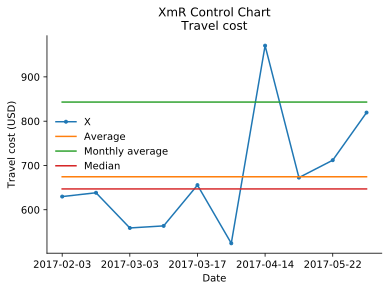

In [5]:
# Create a graph of "individual commits v. date".

# Create a single subplot.
# Plot "total commits v. date".
ax = x_values[['X']].plot.line(legend=False, marker='o', markersize=3)
x_values['Average'].plot.line(legend=True, ax=ax).axis('auto')
x_values['Monthly average'].plot.line(legend=True, ax=ax).axis('auto')
x_values['Median'].plot.line(legend=True, ax=ax).axis('auto')
ax.axis('auto')
# Remove the top and right spines.
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Place the ticks outside the axes.
ax.tick_params(direction='out')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_title(title + '\n' + subtitle)
# Add the Y axis label.
ax.set_ylabel(ylabel)
# Add the X axis label.
ax.set_xlabel(xlabel)
# Remove the box around the legend.
ax.legend(frameon=False)
# Save the graph as svg and pdf.
ax.figure.savefig('xmr.svg', format='svg')
ax.figure.savefig('xmr.pdf', format='pdf')

# Still to do

- Calculate moving range and put in a column
- Calculate upper control limit using rational subgroup formula and put in column
- Plot upper control limit for individual control chart
- Plot moving range on mR control chart
- Calucate upper control limit for average moving range and put in column
- Plot upper control limit for moving range control chart